In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Final Year Research/data/garments_worker_productivity.csv')

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


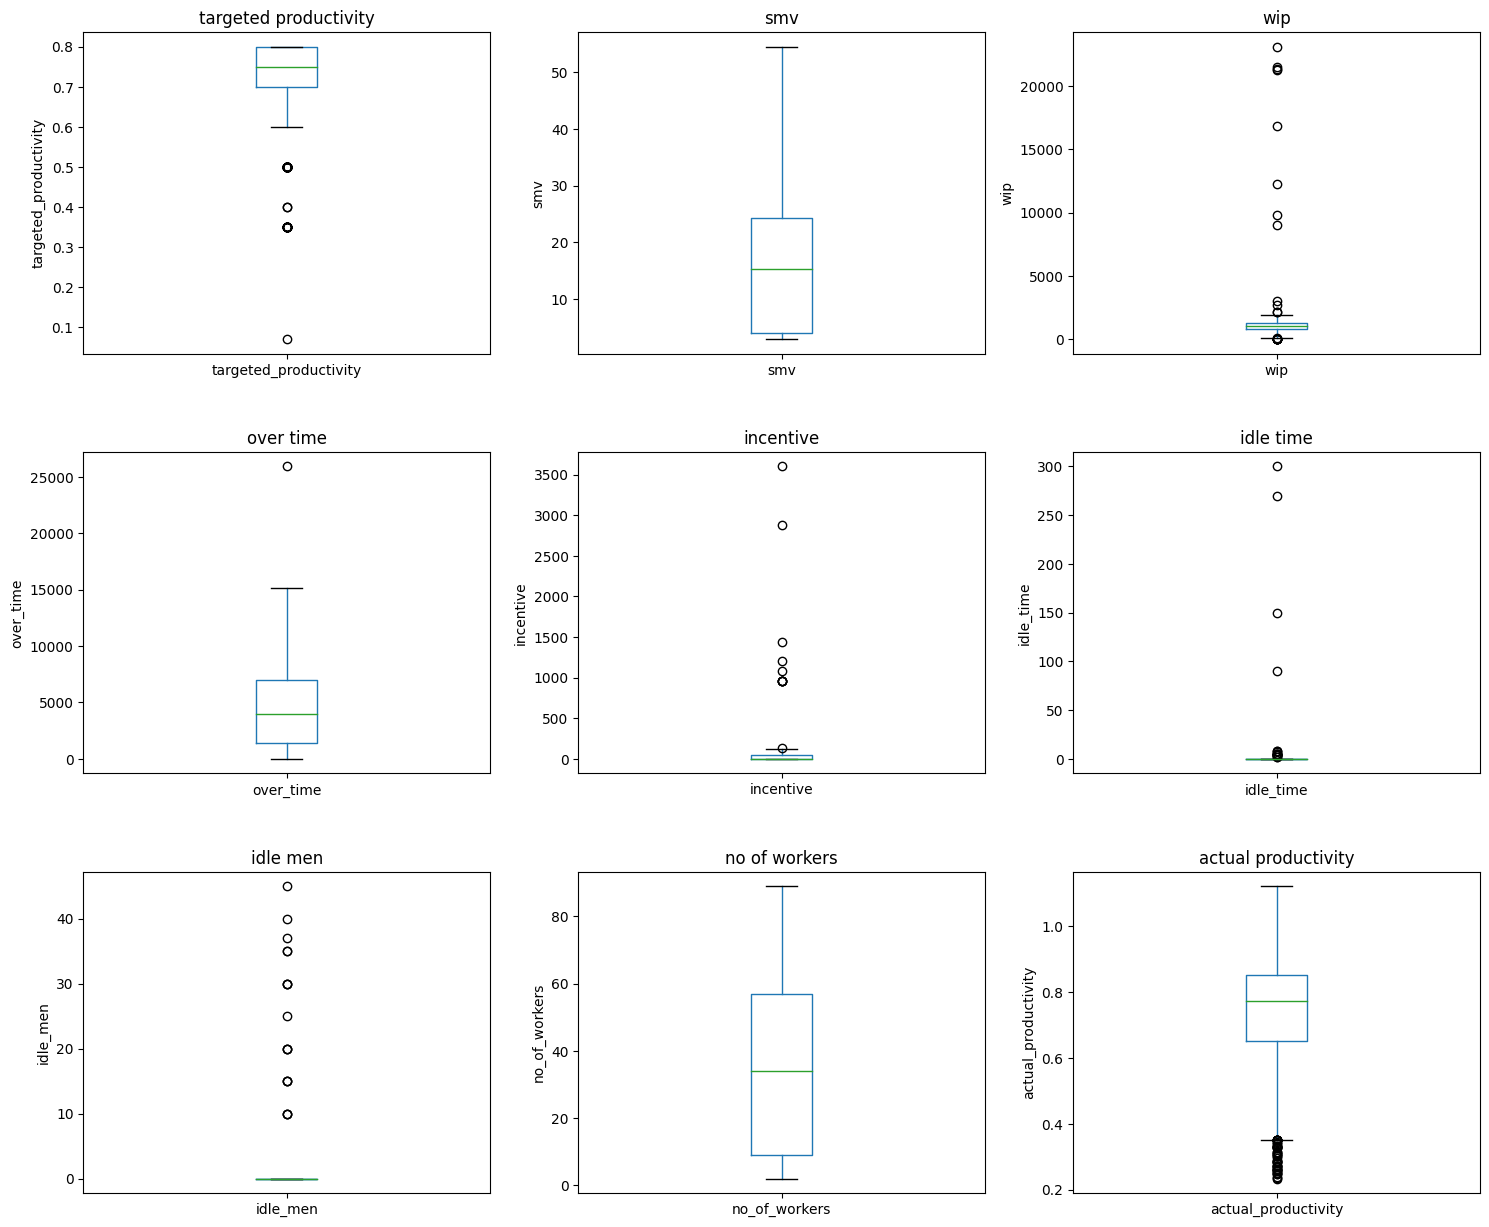

In [ ]:
categorical = ["quarter", "department", "day", "team"]
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity', 'no_of_style_change']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
# actual_productivity

In [ ]:
data['no_of_style_change'] = data['no_of_style_change'].astype(str)
data['team'] = data['team'].astype(str)
data = data.replace(['finishing '], ['finishing'])
data = data.replace(['sweing'], ['sewing'])
data['wip'].fillna(0 ,inplace=True)
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

data.loc[data['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
data.loc[data['no_of_workers'] == 89, 'no_of_workers'] = 35

# data['date'] = pd.to_datetime(data['date'])

# import datetime
# garment_year = data['date'].dt.strftime('%Y')
# garment_month = data['date'].dt.strftime('%m')

# data.insert(1, 'month', garment_month.astype(str))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
data = data.drop(['date'], axis = 1)

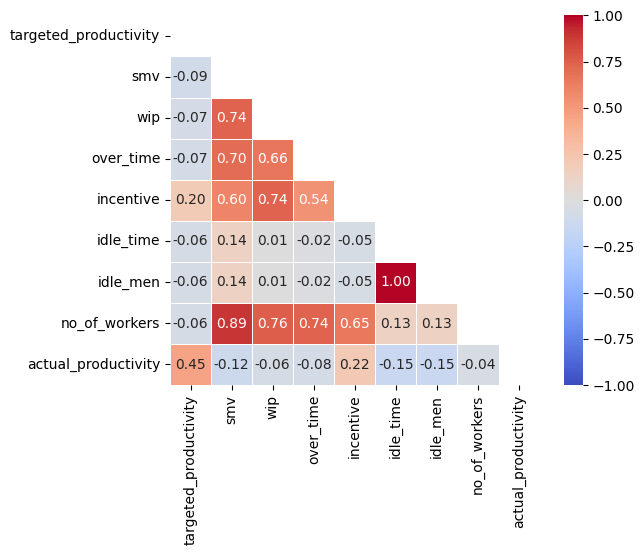

In [ ]:
numerical = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical = [feature for feature in data.columns if data[feature].dtype == 'O']

mask = np.triu(np.ones_like(data[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(data[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
data.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   object 
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 131.0+ 

## Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   object 
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   object 
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 131.0+ 

In [ ]:
torch.manual_seed(42)

In [ ]:
categorical = ['day', 'quarter', 'department', 'team']
numerical = ['no_of_workers','targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change']
# numerical = ['targeted_productivity', 'incentive']
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
categorical_data = encoder.fit_transform(data[categorical])

# Scale numerical columns
scaler = MinMaxScaler()
# numerical.remove('actual_productivity')
numerical_data = scaler.fit_transform(data[numerical])

# Combine encoded categorical and scaled numerical data
X = np.concatenate([categorical_data, numerical_data], axis=1)
y = data['actual_productivity']

# Feature scaling
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
X[1]

array([0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.88888889, 0.        ])

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
X_train.shape[1]

27

In [ ]:
class GarmentProductivityModel(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        # x = self.sigmoid(x)
        return x

# Hyperparameters
input_size = X_train.shape[1]   # 40
hidden_size_1 = 32
hidden_size_2 = 16
output_size = 1
learning_rate = 0.01
num_epochs = 20

# Create model instance
model = GarmentProductivityModel(input_size, hidden_size_1, hidden_size_2, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
train_losses = []
val_losses = []
test_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)

        # Reshape labels to match the output shape
        labels = labels.view(-1, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    # Print or log the average training and validation loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

#Test
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print(f"Test Loss: {test_loss:.4f}")


Epoch [1/20], Train Loss: 0.1432, Val Loss: 0.0721
Epoch [2/20], Train Loss: 0.0545, Val Loss: 0.0530
Epoch [3/20], Train Loss: 0.0482, Val Loss: 0.0588
Epoch [4/20], Train Loss: 0.0459, Val Loss: 0.0461
Epoch [5/20], Train Loss: 0.0373, Val Loss: 0.0425
Epoch [6/20], Train Loss: 0.0336, Val Loss: 0.0387
Epoch [7/20], Train Loss: 0.0336, Val Loss: 0.0409
Epoch [8/20], Train Loss: 0.0308, Val Loss: 0.0418
Epoch [9/20], Train Loss: 0.0285, Val Loss: 0.0400
Epoch [10/20], Train Loss: 0.0279, Val Loss: 0.0387
Epoch [11/20], Train Loss: 0.0253, Val Loss: 0.0354
Epoch [12/20], Train Loss: 0.0264, Val Loss: 0.0349
Epoch [13/20], Train Loss: 0.0253, Val Loss: 0.0367
Epoch [14/20], Train Loss: 0.0253, Val Loss: 0.0343
Epoch [15/20], Train Loss: 0.0244, Val Loss: 0.0371
Epoch [16/20], Train Loss: 0.0225, Val Loss: 0.0369
Epoch [17/20], Train Loss: 0.0238, Val Loss: 0.0342
Epoch [18/20], Train Loss: 0.0225, Val Loss: 0.0335
Epoch [19/20], Train Loss: 0.0217, Val Loss: 0.0363
Epoch [20/20], Train 

In [ ]:
with torch.no_grad():
    test_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, labels).item() * inputs.size(0)
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print(f"Test Loss: {test_loss:.4f}")


Test Loss: 0.0362


In [ ]:
# Make predictions on the test set
y_pred = model(X_test_tensor).squeeze(1)

# Calculate RMSE and MAE
def rmse(y_true, y_pred):
  return torch.sqrt(torch.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
  return torch.mean(torch.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
  mean_y_true = torch.mean(y_true)
  ss_tot = torch.sum((y_true - mean_y_true) ** 2)
  ss_res = torch.sum((y_true - y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2.item()

rmse_val = rmse(y_test_tensor, y_pred)
mae_val = mae(y_test_tensor, y_pred)
r2_val = r2_score(y_test_tensor, y_pred)

print("RMSE:", rmse_val.item())
print("MAE:", mae_val.item())
print("R-squared:", r2_val)

RMSE: 0.18181319534778595
MAE: 0.12925979495048523
R-squared: -0.16083407402038574


In [ ]:
y_test_tensor.shape

torch.Size([120])

In [ ]:
y_pred

tensor([0.8264, 0.8006, 0.6222, 0.7769, 0.6570, 0.7663, 0.5881, 0.7669, 0.8167,
        0.6834, 0.7195, 0.8609, 0.6374, 0.6806, 0.8614, 0.5739, 1.2112, 0.7326,
        0.6913, 0.6101, 0.7883, 0.6963, 0.6369, 0.8518, 0.6419, 0.8449, 0.7045,
        0.8332, 0.6547, 0.7483, 0.7643, 0.7288, 0.5467, 0.6907, 0.5965, 0.6433,
        0.6912, 0.6078, 0.7785, 0.8042, 0.7200, 0.8331, 0.9131, 0.7931, 0.7395,
        0.7164, 0.6647, 0.8040, 0.7467, 0.6261, 0.8371, 0.7452, 0.6553, 0.7690,
        0.7002, 0.6324, 0.8567, 0.7112, 0.6576, 0.6809, 0.6785, 0.7364, 0.7116,
        0.8206, 0.6622, 0.7633, 0.7159, 0.6159, 0.7097, 0.6497, 0.6730, 0.6393,
        0.7815, 0.6875, 0.5786, 0.9371, 0.6674, 0.6961, 0.6622, 0.6307, 0.7861,
        0.7115, 0.8524, 0.7750, 0.6010, 0.7199, 0.9333, 0.6475, 0.6704, 0.6083,
        0.7321, 0.6129, 0.7004, 0.7647, 0.7745, 0.6146, 0.8553, 0.8713, 0.6811,
        0.6393, 0.8254, 0.7702, 0.6004, 0.7452, 0.6772, 0.7188, 0.5793, 0.7318,
        0.7876, 0.6821, 0.6347, 0.8403, 

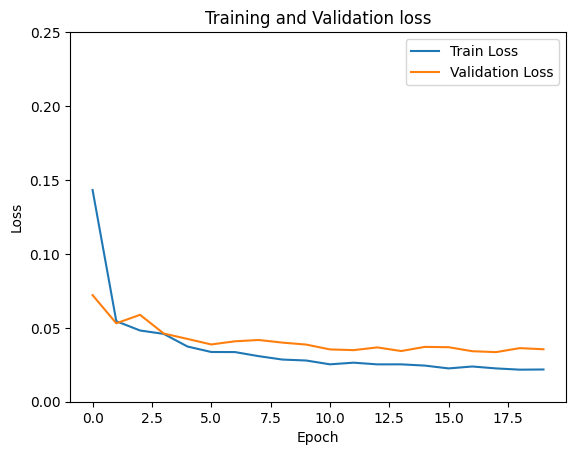

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
# plt.plot(test_loss, label='Test Loss')  # Plot test loss as a point
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 0.25)
plt.title('Training and Validation loss')
plt.legend()
plt.show()

### Save the Model

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Final Year Research/garment_nn_model_1.pt')

### Load the model

In [ ]:
# Load the Saved Model
load_model = GarmentProductivityModel(input_size, hidden_size_1, hidden_size_2, output_size)
load_model.load_state_dict(torch.load('/content/drive/MyDrive/Final Year Research/garment_nn_model_1.pt'))

<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
load_model.eval()

GarmentProductivityModel(
  (fc1): Linear(in_features=27, out_features=32, bias=True)
  (relu): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [ ]:
# Quarter1, sewing, Thursday, 0.80, 26.16, 1108.0, 7080.0, 98.000000, 0.0, 0, 0, 59        # 0.940725

In [ ]:
new_data = torch.tensor(X[0], dtype=torch.float32)

In [ ]:
with torch.no_grad():
    predicted_productivity = load_model(new_data)

print("Predicted productivity:", predicted_productivity.item())

Predicted productivity: 0.7419010996818542


In [ ]:
y_test_prediction = []

for i in range(0, len(y_pred)):
    y_test_prediction.append(y_pred[i].item())

In [ ]:
y_test_prediction

[0.8263674974441528,
 0.8005985021591187,
 0.6221948862075806,
 0.7769169807434082,
 0.6570442914962769,
 0.7663277387619019,
 0.5880946516990662,
 0.766875147819519,
 0.8166888952255249,
 0.6834049224853516,
 0.7194507122039795,
 0.8608951568603516,
 0.6373641490936279,
 0.6806196570396423,
 0.8614113926887512,
 0.5739319920539856,
 1.2112091779708862,
 0.7326427698135376,
 0.6912569999694824,
 0.6101105213165283,
 0.7882508039474487,
 0.6963286995887756,
 0.6369187831878662,
 0.8517996072769165,
 0.6419080495834351,
 0.8448562622070312,
 0.7044719457626343,
 0.833236813545227,
 0.6546798944473267,
 0.7482749819755554,
 0.7643364667892456,
 0.7287794351577759,
 0.5467479228973389,
 0.6907413005828857,
 0.5965349078178406,
 0.6432687044143677,
 0.6912249326705933,
 0.607770562171936,
 0.7785254716873169,
 0.8042029142379761,
 0.7199566960334778,
 0.833137035369873,
 0.9130624532699585,
 0.7930974364280701,
 0.7395445108413696,
 0.7164029479026794,
 0.6647074818611145,
 0.80402576923370

In [ ]:
item_index = [i for i in np.arange(0, 120)]

In [ ]:
len(item_index)

120

In [ ]:
test_prediction = pd.DataFrame(list(zip(item_index, list(y_test), y_test_prediction)), columns=['item_index', 'y_test', 'y_prediction'])
test_prediction

,item_index,y_test,y_prediction
0,0,0.830000,0.826367
1,1,0.768847,0.800599
2,2,0.700251,0.622195
3,3,0.800309,0.776917
4,4,0.672141,0.657044
...,...,...,...
115,115,0.550350,0.644807
116,116,0.800116,0.679899
117,117,0.700437,0.698049
118,118,0.999995,0.914547


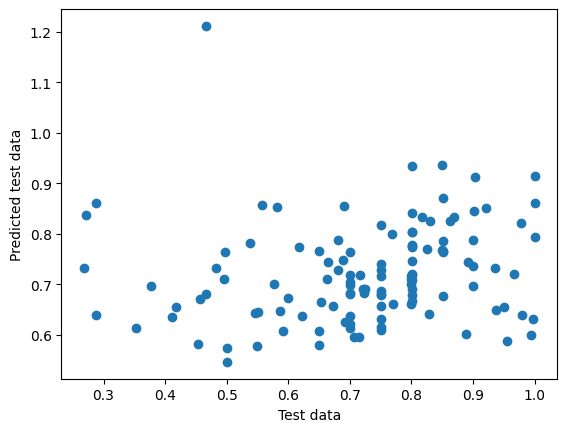

In [ ]:
plt.scatter(test_prediction['y_test'], test_prediction['y_prediction'])
plt.xlabel('Test data')
plt.ylabel('Predicted test data')
plt.show()

In [ ]:
## identify some relationships

data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


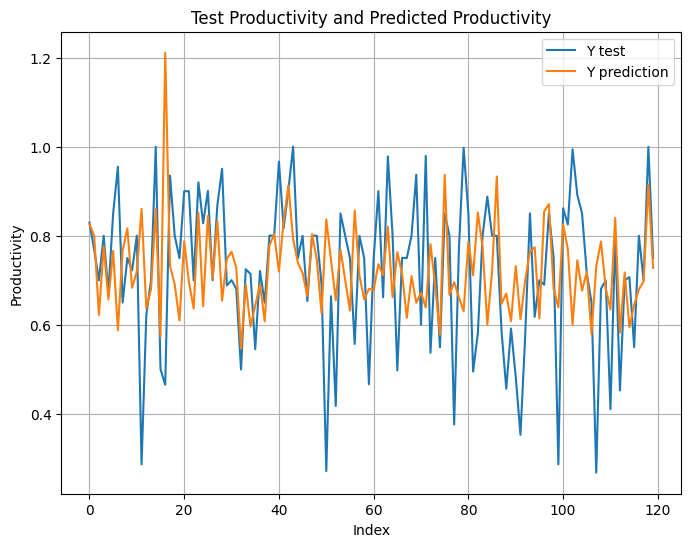

In [ ]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(test_prediction.item_index, test_prediction.y_test, label='Y test')
plt.plot(test_prediction.item_index, test_prediction.y_prediction, label='Y prediction')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Productivity')
plt.title('Test Productivity and Predicted Productivity')
# plt.xticks(np.arange(min(test_prediction.item_index), max(test_prediction.item_index) + 1, 10))
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# evaluation metric after model training
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_test = RandomForestRegressor()
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0576
- Mean Absolute Error: 0.0350
- R2 Score: 0.8941

Model performance for Testing set
- Root Mean Squared Error: 0.1376
- Mean Absolute Error: 0.0901
- R2 Score: 0.2872
